# **TSF GRIP_NOV2021 - Data Science & Bussiness Analytics Internship**

> **Level - Intermediate**

> **Task :- Exploratory Data Analysis on Dataset - Terrorism**

> **Author: CHINMAY TRIPATHI**

### **Importing Libraries**


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
file = r'/content/drive/MyDrive/Colab Notebooks/globalterrorismdb_0718dist.csv'
data  = pd.read_csv(file, encoding=('latin1'))

In [ ]:
data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,NaN,Aut

In [ ]:
data.shape

(181691, 135)

In [ ]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### **Renaming Columns**

In [ ]:
data.rename(columns = {  'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'city':'City', 'region_txt':'Region', 'gname':'Group', 'motive':'Motive', 'nkill':'Kill', 'nwound':'Wound',
                       'summary':'Summary', 'target1':'Target1',  'attacktype1_txt':'attacktype1', 'weaptype1_txt':'weaptype1', 'targsubtype1_txt':'Targsubtype'}, inplace= True)

In [ ]:
data.head(7)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,provstate,City,latitude,longitude,specificity,vicinity,location,Summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,Targsubtype,corp1,Target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,Kill,nkillus,nkillter,Wound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,NaN,Automatic firearm,0.0,NaN

In [ ]:
data.columns.values

array(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region', 'Region',
       'provstate', 'City', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'Summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1', 'attacktype2',
       'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1',
       'targtype1_txt', 'targsubtype1', 'Targsubtype', 'corp1', 'Target1',
       'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt',
       'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2',
       'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt',
       'Group', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3',
       'Motive', 'guncertain1', 'guncertain2', 'guncertain3',
       'individual', 'nperps',

In [ ]:
data_new= data[['Year','Month','Day','Country','City','Region','Group','Motive','Kill','Wound','Summary','Target1', 'attacktype1','weaptype1', 'Targsubtype']]
data_new.head(6)

,Year,Month,Day,Country,City,Region,Group,Motive,Kill,Wound,Summary,Target1,attacktype1,attacktype1,weaptype1,weaptype1,Targsubtype
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,MANO-D,NaN,1.0,0.0,NaN,Julio Guzman,1,Assassination,13,Unknown,Named Civilian
1,1970,0,0,Mexico,Mexico city,North America,23rd of September Communist League,NaN,0.0,0.0,NaN,"Nadine Chaval, daughter",6,Hostage Taking (Kidnapping),13,Unknown,"Diplomatic Personnel (outside of embassy, cons..."
2,1970,1,0,Philippines,Unknown,Southeast Asia,Unknown,NaN,1.0,0.0,NaN,Employee,1,Assassination,13,Unknown,Radio Journalist/Staff/Facility
3,1970,1,0,Greece,Athens,Western Europe,Unknown,NaN,NaN,NaN,NaN,U.S. Embassy,3,Bombing/Explosion,6,Explosives,Embassy/Consulate
4,1970,1,0,Japan,Fukouka,East Asia,Unknown,NaN,NaN,NaN,NaN,U.S. Consulate,7,Facility/Infrastructure Attack,8,Incendiary,Embassy/Consulate
5,1970,1,1,United States,Cairo,North America,Black Nationalists,To protest the Cairo Illinois Police Deparment,0.0,0.0,1/1/1970: Unknown African American assailants ...,Cairo Police Headquarters,2,Armed Assault,5,Firearms,"Police Building (headquarters, station, school)"


In [ ]:
data_new.shape

(181691, 17)

In [ ]:

data_new.dtypes

Year             int64
Month            int64
Day              int64
Country         object
City            object
Region          object
Group           object
Motive          object
Kill           float64
Wound          float64
Summary         object
Target1         object
attacktype1      int64
attacktype1     object
weaptype1        int64
weaptype1       object
Targsubtype     object
dtype: object

In [ ]:
data_new.isnull().sum()/len(data_new)*100

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
City            0.238867
Region          0.000000
Group           0.000000
Motive         72.171984
Kill            5.676120
Wound           8.977330
Summary        36.396409
Target1         0.350045
attacktype1     0.000000
attacktype1     0.000000
weaptype1       0.000000
weaptype1       0.000000
Targsubtype     5.709144
dtype: float64

In [ ]:
data_new.drop(['Summary', 'Motive'], axis=1,inplace=True)

In [ ]:
data_new

,Year,Month,Day,Country,City,Region,Group,Kill,Wound,Target1,attacktype1,attacktype1,weaptype1,weaptype1,Targsubtype
0,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,MANO-D,1.0,0.0,Julio Guzman,1,Assassination,13,Unknown,Named Civilian
1,1970,0,0,Mexico,Mexico city,North America,23rd of September Communist League,0.0,0.0,"Nadine Chaval, daughter",6,Hostage Taking (Kidnapping),13,Unknown,"Diplomatic Personnel (outside of embassy, cons..."
2,1970,1,0,Philippines,Unknown,Southeast Asia,Unknown,1.0,0.0,Employee,1,Assassination,13,Unknown,Radio Journalist/Staff/Facility
3,1970,1,0,Greece,Athens,Western Europe,Unknown,NaN,NaN,U.S. Embassy,3,Bombing/Explosion,6,Explosives,Embassy/Consulate
4,1970,1,0,Japan,Fukouka,East Asia,Unknown,NaN,NaN,U.S. Consulate,7,Facility/Infrastructure Attack,8,Incendiary,Embassy/Consulate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Ceelka Geelow,Sub-Saharan Africa,Al-Shabaab,1.0,2.0,Checkpoint,2,Armed Assault,5,Firearms,Military Checkpoint
181687,2017,12,31,Syria,Jableh,Middle East & North Africa,Muslim extremists,2.0,7.0,Hmeymim Air Base,3,Bombing/Explosion,6,Explosives,Military Barracks/Base/Headquarters/Checkpost
181688,2017,12,31,Philippines,Kubentog,Southeast Asia,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Houses,7,Facility/Infrastructure Attack,8,Incendiary,House/Apartment/Residence
181689,2017,12,31,India,Imphal,South Asia,Unknown,0.0,0.0,Office,3,Bombing/Explosion,6,Explosives,Government Building/Facility/Office


In [ ]:
data_new.isnull().sum()

Year               0
Month              0
Day                0
Country            0
City             434
Region             0
Group              0
Kill           10313
Wound          16311
Target1          636
attacktype1        0
attacktype1        0
weaptype1          0
weaptype1          0
Targsubtype    10373
dtype: int64

In [ ]:
data_new['City'].fillna(value='Not specified', inplace=True)
data_new['Target1'].fillna(value='Unknown', inplace=True)
data_new['Targsubtype'].fillna(value='Not specified', inplace=True)

In [ ]:
print(data_new['Kill'].mode())
print(data_new['Wound'].mode())

0    0.0
dtype: float64
0    0.0
dtype: float64


In [ ]:
data_new['Kill']= data_new['Kill'].fillna(0)
data_new['Wound'] = data_new['Wound'].fillna(0)

In [ ]:
data_new.isnull().sum()

Year               0
Month              0
Day                0
Country            0
City             434
Region             0
Group              0
Kill               0
Wound              0
Target1          636
attacktype1        0
attacktype1        0
weaptype1          0
weaptype1          0
Targsubtype    10373
dtype: int64

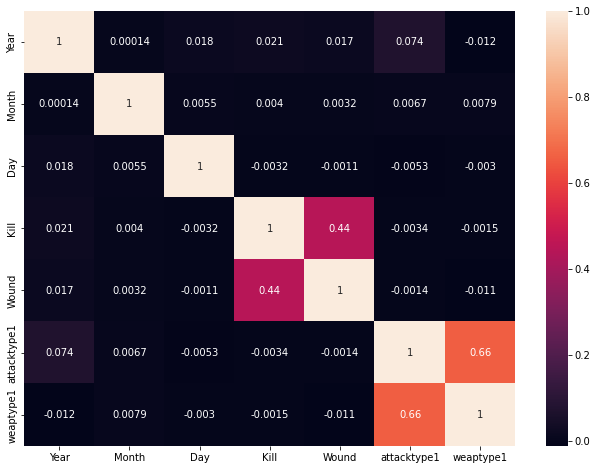

In [ ]:
plt.figure(figsize=(11,8))
sns.heatmap(data_new.corr(), annot=True)

In [ ]:
data_new['Year'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

**Number of Terrorist Activities each Year**

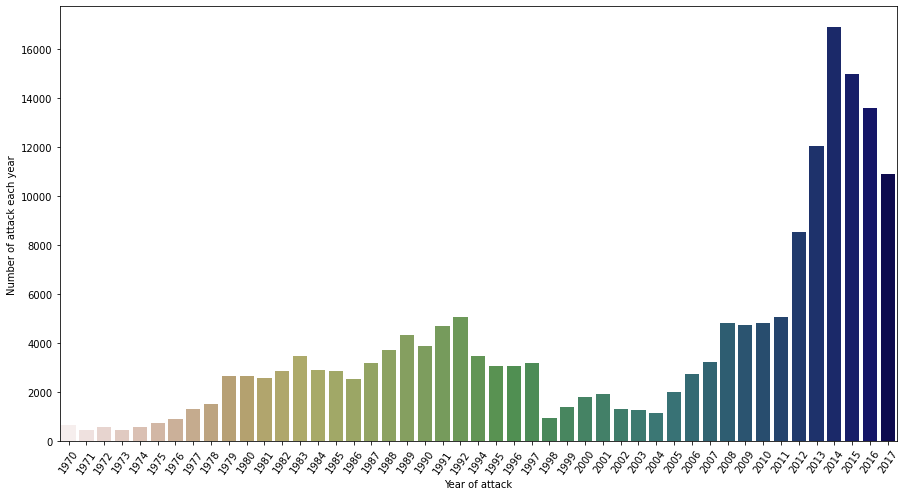

In [ ]:
Year = data_new['Year'].unique()
count_of_years = data_new['Year'].value_counts().sort_index()
plt.figure(figsize=(15,8))
sns.barplot(x= Year, y= count_of_years, palette= 'gist_earth_r')
plt.xticks(rotation = 55)
plt.xlabel('Year of attack')
plt.ylabel('Number of attack each year')
plt.show()

In [ ]:
data_new.groupby(['Region']).count()['Kill']

Region
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: Kill, dtype: int64

Text(0, 0.5, 'casualities')

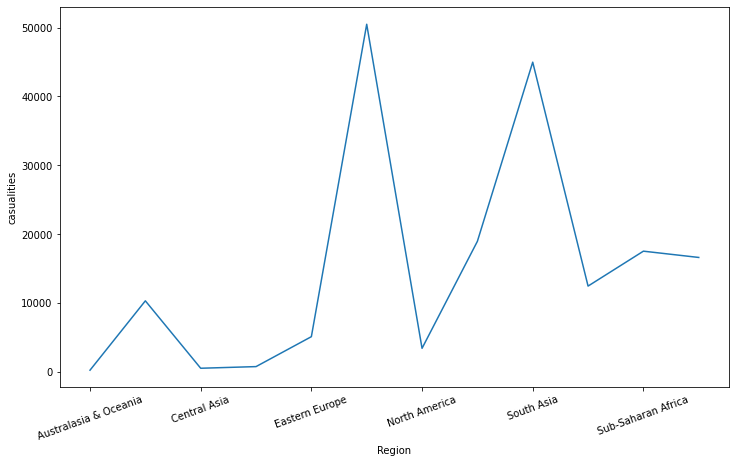

In [ ]:
plt.subplots(figsize=(12,7))
data_new.groupby(['Region']).count()['Kill'].plot()
plt.xticks(rotation=20)
plt.ylabel('casualities')

In [ ]:
data_new.groupby(['Region']).count()['Wound']

Region
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
Middle East & North Africa     50474
North America                   3456
South America                  18978
South Asia                     44974
Southeast Asia                 12485
Sub-Saharan Africa             17550
Western Europe                 16639
Name: Wound, dtype: int64

Text(0, 0.5, 'casualities')

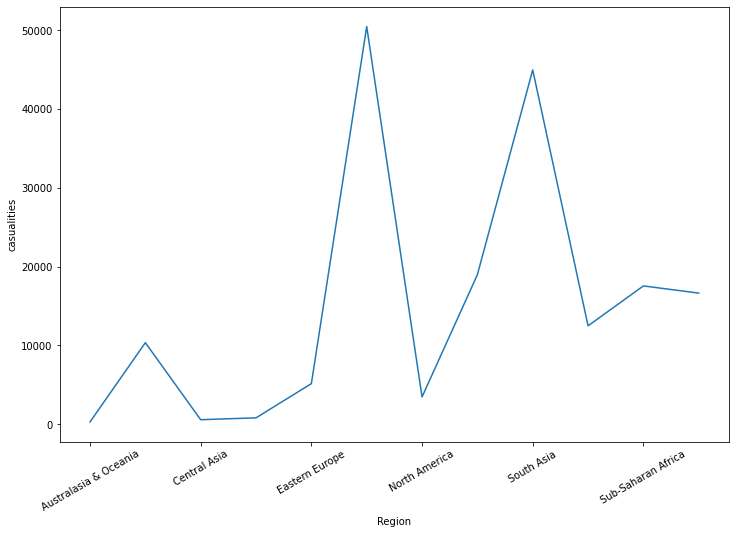

In [ ]:
plt.subplots(figsize=(12,8))
data_new.groupby(['Region']).count()['Wound'].plot()
plt.xticks(rotation=30)
plt.ylabel('casualities')

**Top Countries affected by Terror Attacks**

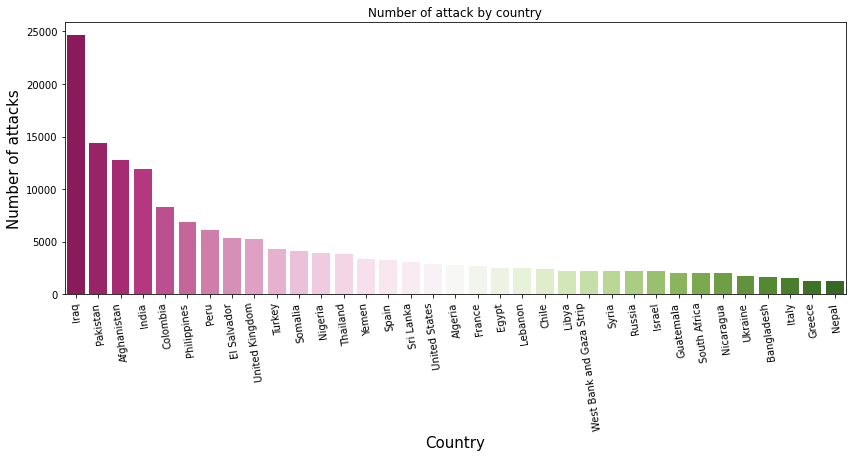

we can conclude that the country which was mostly attacks is 'Iraq' . 


In [ ]:
plt.subplots(figsize=(14,5))
sns.countplot('Country', data=data_new, palette='PiYG', order=data_new['Country'].value_counts()[:35].index)
plt.xticks(rotation=98)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Number of attacks', fontsize=15)
plt.title('Number of attack by country')
plt.show()
print("we can conclude that the country which was mostly attacks is 'Iraq' . ")

# **Thus, we can conclude that the country which was mostly attacks is 'Iraq' .**